### Importamos las librerias necesarias

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score 
from pydotplus import graph_from_dot_data

### Importamos el dataset titanic para el entrenamiento

In [23]:
df = pd.read_csv('titanic_train_out.csv')

### Seleccionamos las dimenciones para entrenar y el target

In [3]:
df.keys()

Index(['Survived', 'Pclass', 'Sex', 'Age', 'Fare', 'Embarked', 'Title',
       'IsAlone'],
      dtype='object')

In [4]:
X = df.iloc[:, [1,2,3,4,5,6,7]].values
y = df.Survived

### Separamos y_train y_test x_train y x_test

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### Para saber que profundidad de arbol nos da un mejor resultado entrenamos el modelo para varias profundidades y comparamos

Matriz de Confusión para Profundidad 1


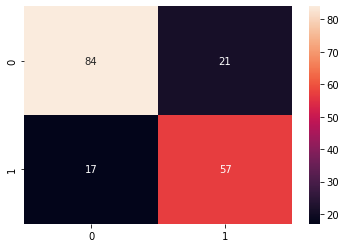

acuracy: 0.7877094972067039
precision: 0.7307692307692307
recall 0.7702702702702703
f1 0.75
Matriz de Confusión para Profundidad 2


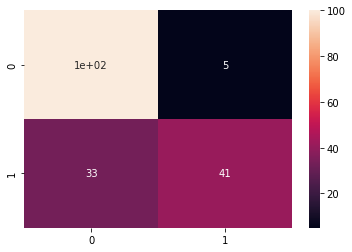

acuracy: 0.7877094972067039
precision: 0.8913043478260869
recall 0.5540540540540541
f1 0.6833333333333333
Matriz de Confusión para Profundidad 3


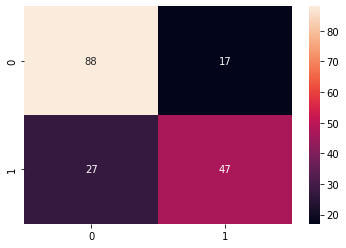

acuracy: 0.7541899441340782
precision: 0.734375
recall 0.6351351351351351
f1 0.681159420289855
Matriz de Confusión para Profundidad 4


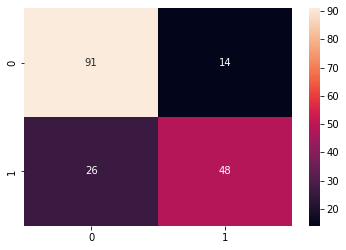

acuracy: 0.776536312849162
precision: 0.7741935483870968
recall 0.6486486486486487
f1 0.7058823529411764
Matriz de Confusión para Profundidad 5


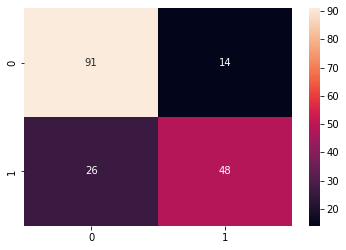

acuracy: 0.776536312849162
precision: 0.7741935483870968
recall 0.6486486486486487
f1 0.7058823529411764


In [15]:
max_depth_range = list(range(1, 6))
accuracy = []
for depth in max_depth_range:
    classifier = DecisionTreeClassifier(max_depth = depth,random_state = 0)
    classifier.fit(X_train, y_train)    
    y_pred = classifier.predict(X_test)
    matriz = confusion_matrix(y_test, y_pred)
    print('Matriz de Confusión para Profundidad',depth)
    sn.heatmap(matriz, annot=True)
    plt.show()
    #accuracy
    print("acuracy:",accuracy_score(y_test, y_pred))
    #precision score
    print("precision:",precision_score(y_test, y_pred))
    #recall score
    print("recall" ,recall_score(y_test,y_pred))
    #F1 score
    print("f1" ,f1_score(y_test, y_pred))


### Suponiendo que el mejor resultado es el deprofundidad 4, podemos imprimir el arbol de varias maneras

In [21]:
classifier = DecisionTreeClassifier(max_depth = 4,random_state = 0)
classifier.fit(X_train, y_train)   

DecisionTreeClassifier(max_depth=4, random_state=0)

[Text(0.5089285714285714, 0.9166666666666666, 'X[5] <= 1.5\ngini = 0.469\nsamples = 712\nvalue = [444, 268]'),
 Text(0.27232142857142855, 0.75, 'X[0] <= 1.5\ngini = 0.26\nsamples = 416\nvalue = [352, 64]'),
 Text(0.14285714285714285, 0.5833333333333334, 'X[2] <= 36.5\ngini = 0.454\nsamples = 86\nvalue = [56, 30]'),
 Text(0.07142857142857142, 0.4166666666666667, 'X[3] <= 2.5\ngini = 0.471\nsamples = 29\nvalue = [11, 18]'),
 Text(0.03571428571428571, 0.25, 'X[4] <= 0.5\ngini = 0.198\nsamples = 9\nvalue = [1, 8]'),
 Text(0.017857142857142856, 0.08333333333333333, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]'),
 Text(0.05357142857142857, 0.08333333333333333, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.10714285714285714, 0.25, 'X[2] <= 18.0\ngini = 0.5\nsamples = 20\nvalue = [10, 10]'),
 Text(0.08928571428571429, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]'),
 Text(0.125, 0.08333333333333333, 'gini = 0.499\nsamples = 19\nvalue = [10, 9]'),
 Text(0.21428571428571427, 

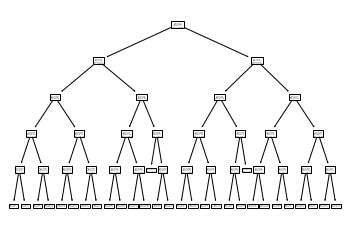

In [20]:
tree.plot_tree(classifier)

In [22]:
dot_data = export_graphviz(classifier,class_names = ['Not Survived', 'Survived'] ,filled = True, rounded = True,special_characters = True)
graph = graph_from_dot_data(dot_data)
graph.write_png('arbol_profundidad_4.png')

True

### Importamos el dataset para predecir 

In [24]:
df_test = pd.read_csv('titanic_test_out.csv')

### Realizamos la prediccion para un data set sin los target

In [27]:
 df_test['Survived'] = classifier.predict(df_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:443: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


In [28]:
df_test

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Survived
0,3,0,34,0,2,1,1,0
1,3,1,47,0,0,3,0,0
2,2,0,62,1,2,1,1,0
3,3,0,27,1,0,1,1,0
4,3,1,22,1,0,3,0,1
...,...,...,...,...,...,...,...,...
413,3,0,24,1,0,1,1,0
414,1,1,39,3,1,5,1,1
415,3,0,38,0,0,1,1,0
416,3,0,24,1,0,1,1,0


### Podemos realizar el entrenamiento con otro algoritmo para comprar las metricas por ejemplo vecinos cercanos

In [30]:
classifier = KNeighborsClassifier(n_neighbors = 5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [31]:
y_pred = classifier.predict(X_test)

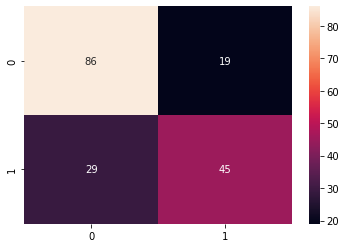

In [32]:
matriz = confusion_matrix(y_test, y_pred)
sn.heatmap(matriz,annot=True)
plt.show()

In [33]:
accuracy_score(y_test, y_pred)

0.7318435754189944

In [34]:
precision_score(y_test, y_pred)

0.703125

In [35]:
recall_score(y_test, y_pred)

0.6081081081081081

In [36]:
f1_score(y_test, y_pred)

0.6521739130434783